# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [104]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()
print df_raw.tail()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
     admit    gre   gpa  prestige
395      0  620.0  4.00       2.0
396      0  560.0  3.04       3.0
397      0  460.0  2.63       2.0
398      0  700.0  3.65       2.0
399      0  600.0  3.89       3.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [13]:
#function
print df_raw['admit'].mean(),
print df_raw.sum(),
print df_raw.mode(),
print df_raw.count(),
print df_raw.skew()

0.3175 admit          127.00
gre         234040.00
gpa           1349.59
prestige       992.00
dtype: float64    admit    gre  gpa  prestige
0      0  620.0  4.0       2.0 admit       400
gre         398
gpa         398
prestige    399
dtype: int64 admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64


In [4]:
df_raw.describe()

/Users/craig.wood/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of values for GRE is so much greater than GPA (i.e.: 0-600 vs. 0-4.0).

#### Question 4. Drop data points with missing data


In [14]:
pd.isnull(df_raw)

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [15]:
df_raw.isnull()

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [50]:
drop = df_raw.dropna()
drop

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [49]:
drop.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: When I previously ran the .count function, we saw a max observation at 400. After running the .dropna() function, we see the count for each variable is at 397, so we know 3 rows from the raw data had missing data and the the observations with missing data have indeed been dropped.

#### Question 6. Create box plots for GRE and GPA

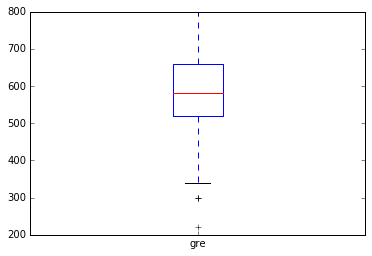

In [51]:
#boxplot 1 GRE
#plt.boxplot(df_raw)
drop['gre'].plot(kind='box')

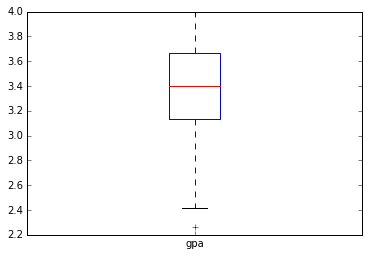

In [52]:
#boxplot 2 GPA
drop['gpa'].plot(kind='box')

In [53]:
#boxplot gre + gpa on the same plot
#drop[:].plot(kind='box')

In [ ]:
#Just playing around; haven't figured out how to plot both yet.

#### Question 7. What do this plots show?

Answer: The plots show 

the mean as the red line,
the interquartile 3 (75%) as the top blue line
the interquartile 1 (25%) as the bottom blue line



#### Question 8. Describe each distribution 

(array([  1.,   3.,  16.,  28.,  50.,  75.,  81.,  64.,  44.,  35.]),
 array([ 220.,  278.,  336.,  394.,  452.,  510.,  568.,  626.,  684.,
         742.,  800.]),
 <a list of 10 Patch objects>)

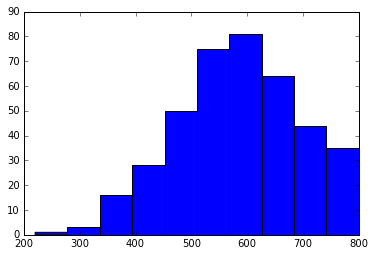

In [59]:
# plot the distribution of each variable 
# distribution of gre
plt.hist(drop['gre'])

(array([  3.,   4.,  16.,  32.,  42.,  57.,  76.,  65.,  39.,  63.]),
 array([ 2.26 ,  2.434,  2.608,  2.782,  2.956,  3.13 ,  3.304,  3.478,
         3.652,  3.826,  4.   ]),
 <a list of 10 Patch objects>)

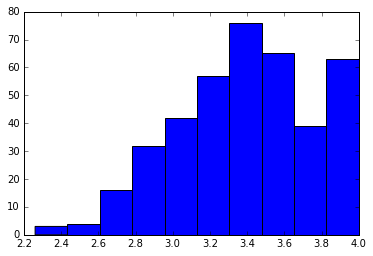

In [60]:
#distribution of gpa
plt.hist(drop['gpa'])

(array([  61.,    0.,    0.,  148.,    0.,    0.,  121.,    0.,    0.,   67.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

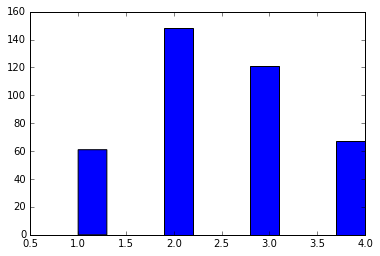

In [65]:
#distribution of prestige
plt.hist(drop['prestige'])

In [ ]:
#try plotting all 3 on one graph

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Not for GRE and GPA as they both skew to the right; The Prestige variable looks like it might be a normal distribution, with a peak in the center and relatively even tails off to the sides.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: I'm not sure I understand this question.

#### Question 11. Which of our variables are potentially colinear? 

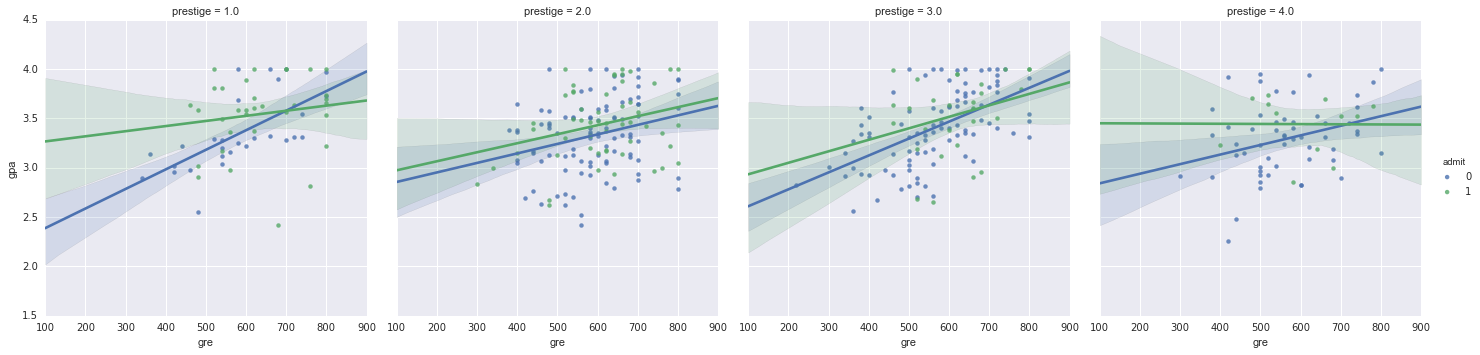

In [80]:
# create a correlation matrix for the data
sns.lmplot(data=drop,
          x='gre', y='gpa',
          col='prestige', hue='admit')

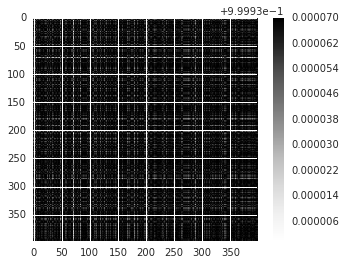

In [85]:
#no colors and I'm not sure this is showing all my data...
#so I'm not quite sure how to make sense of it
a = np.corrcoef(drop)
plt.imshow(a,interpolation='nearest')
plt.colorbar()
plt.show()

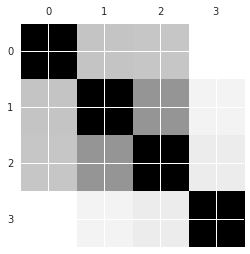

In [88]:
#I have no idea what I'm looking at here.
plt.matshow(drop.corr())

#### Question 12. What did you find?

Answer: I'm looking back at notes and searching online for 'correlation matrix' and attempting to learn from those examples. I'm putting my data into the code, but not sure what I'm seeing or how to make sense of it. Not even sure if I'm approaching the question in the right way.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I will plot a correlation matrix for prestige rankings of schools vs. admit rates. Is there a strong correlation?

#### Question 14. What is your hypothesis? 

Answer: The greater the prestige of an undergraduate degree, the increased chance of being admitted to grad school.

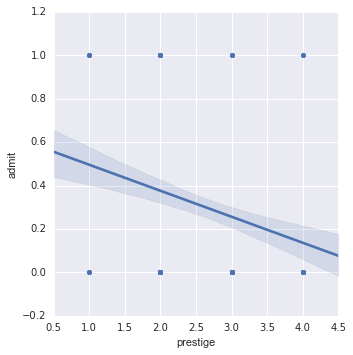

In [91]:
# correlation matrix for prestige vs. admit rates
sns.lmplot(data=drop,
          x='prestige', y='admit')

In [ ]:
#again, not sure I did this right. This seems to indicate that the admit rate 
#was higher with lower prestige rankings

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [103]:
#not sure this did anything
drop2 = df_raw.dropna(thresh=1)
drop2

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

In [110]:
#eh? This did not produce what I expected
#I was expecting a full readout of the 397 rows with the mean (of its respective column) input into the NaN cells.
imp = Imputer(missing_values= 'NaN',
    strategy='mean', axis=0)
imp.fit(df_raw)
x = pd.Series(imp.transform(df_raw).tolist()[0])
print x

0      0.00
1    380.00
2      3.61
3      3.00
dtype: float64
